# Notes

In [2]:
pip install -U sentence-transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 149.5/149.5 kB 3.5 MB/s eta 0:00:00


In [3]:
from sentence_transformers import SentenceTransformer

model = SentenceTransformer('keepitreal/vietnamese-sbert')

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


modules.json:   0%|          | 0.00/229 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/122 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/3.90k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/752 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/540M [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/torch/_utils.py:831: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use tensor.untyped_storage() instead of tensor.storage()
  return self.fget.__get__(instance, owner)()


tokenizer_config.json:   0%|          | 0.00/313 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/895k [00:00<?, ?B/s]

bpe.codes:   0%|          | 0.00/1.14M [00:00<?, ?B/s]

added_tokens.json:   0%|          | 0.00/17.0 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/150 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

In [4]:
sentences = ["Cô giáo đang ăn kem", "Chị gái đang thử món thịt dê"]
embeddings = model.encode(sentences)
print(embeddings)

[[ 0.5584591   0.11873554 -0.03774075 ... -0.09160101  0.27377504
  -0.01684705]
 [ 0.6878684  -0.30957302 -0.083208   ...  0.26208174  0.04669745
   0.01583375]]


In [5]:
embeddings.shape

(2, 768)

In [24]:
import tensorflow as tf


# Download newspapers

In [6]:
import gdown

# Replace with your Google Drive public link
file_url = "https://drive.google.com/file/d/101WTtrtAoXnB3xGc6_i3PemrbpZBugCS/view?usp=sharing"

# Extract the file ID from the link
file_id = file_url.split("/")[-2]

# Define the output file name
output_file = "/content/ThoiSu_DuLich_TheGioi.zip"  # Replace with the desired file name and extension

# Download the file
gdown.download(f"https://drive.google.com/uc?id={file_id}", output_file, quiet=False)


Downloading...
From: https://drive.google.com/uc?id=101WTtrtAoXnB3xGc6_i3PemrbpZBugCS
To: /content/ThoiSu_DuLich_TheGioi.zip
100%|██████████| 1.72M/1.72M [00:00<00:00, 144MB/s]


'/content/ThoiSu_DuLich_TheGioi.zip'

In [7]:
!unzip /content/ThoiSu_DuLich_TheGioi.zip

Archive:  /content/ThoiSu_DuLich_TheGioi.zip
   creating: ThoiSu_DuLich_TheGioi/
   creating: ThoiSu_DuLich_TheGioi/results/
   creating: ThoiSu_DuLich_TheGioi/results/du-lich/
  inflating: ThoiSu_DuLich_TheGioi/results/du-lich/url_001.txt  
  inflating: ThoiSu_DuLich_TheGioi/results/du-lich/url_002.txt  
  inflating: ThoiSu_DuLich_TheGioi/results/du-lich/url_003.txt  
  inflating: ThoiSu_DuLich_TheGioi/results/du-lich/url_004.txt  
  inflating: ThoiSu_DuLich_TheGioi/results/du-lich/url_005.txt  
  inflating: ThoiSu_DuLich_TheGioi/results/du-lich/url_006.txt  
  inflating: ThoiSu_DuLich_TheGioi/results/du-lich/url_007.txt  
  inflating: ThoiSu_DuLich_TheGioi/results/du-lich/url_008.txt  
  inflating: ThoiSu_DuLich_TheGioi/results/du-lich/url_009.txt  
  inflating: ThoiSu_DuLich_TheGioi/results/du-lich/url_010.txt  
  inflating: ThoiSu_DuLich_TheGioi/results/du-lich/url_011.txt  
  inflating: ThoiSu_DuLich_TheGioi/results/du-lich/url_012.txt  
  inflating: ThoiSu_DuLich_TheGioi/results/

# Embedding

In [8]:
categories = ['du-lich',
              'the-gioi',
              'thoi-su']

folders = [f'/content/ThoiSu_DuLich_TheGioi/results/{category}' for category in categories]
folders

['/content/ThoiSu_DuLich_TheGioi/results/du-lich',
 '/content/ThoiSu_DuLich_TheGioi/results/the-gioi',
 '/content/ThoiSu_DuLich_TheGioi/results/thoi-su']

In [14]:
import os
from tqdm.notebook import tqdm

In [15]:
newspapers = []

In [16]:
for folder in folders:
  print(f'Processing: {folder}')
  papers = os.listdir(folder)
  for paper in tqdm(papers):
    paper_path = os.path.join(folder, paper)
    with open(paper_path, 'r', encoding = 'UTF-8') as file:
      content = file.read()
    newspapers.append(content)

Processing: /content/ThoiSu_DuLich_TheGioi/results/du-lich


  0%|          | 0/318 [00:00<?, ?it/s]

Processing: /content/ThoiSu_DuLich_TheGioi/results/the-gioi


  0%|          | 0/317 [00:00<?, ?it/s]

Processing: /content/ThoiSu_DuLich_TheGioi/results/thoi-su


  0%|          | 0/293 [00:00<?, ?it/s]

In [18]:
len(newspapers)

928

In [ ]:
def predict

In [19]:
embeddings = model.encode(newspapers)

In [20]:
embeddings.shape

(928, 768)

In [23]:
embeddings

array([[ 0.0147021 ,  0.20080261,  0.01124801, ...,  0.32433337,
        -0.26336962, -0.18220079],
       [ 0.16413525, -0.02441574, -0.28653377, ..., -0.06774282,
        -0.03266283, -0.17762798],
       [-0.0443529 , -0.1092193 ,  0.1024029 , ...,  0.16310227,
        -0.04369056, -0.01567493],
       ...,
       [-0.036642  , -0.11448768,  0.05003601, ...,  0.503163  ,
        -0.32485878,  0.1185848 ],
       [ 0.18647233, -0.04425072, -0.28792232, ...,  0.11286229,
         0.02169901, -0.06388104],
       [ 0.0053071 , -0.23337153,  0.07863202, ...,  0.18490116,
        -0.35568416, -0.3294471 ]], dtype=float32)

# K-Mean Clustering

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [28]:
# Calculate inertia (sum of squared distances) for different values of k
inertia = []
for k in tqdm(range(2, 30)):
    kmeans = KMeans(n_clusters=k, n_init= 10, random_state=42)
    kmeans.fit(embeddings)
    inertia.append(kmeans.inertia_)



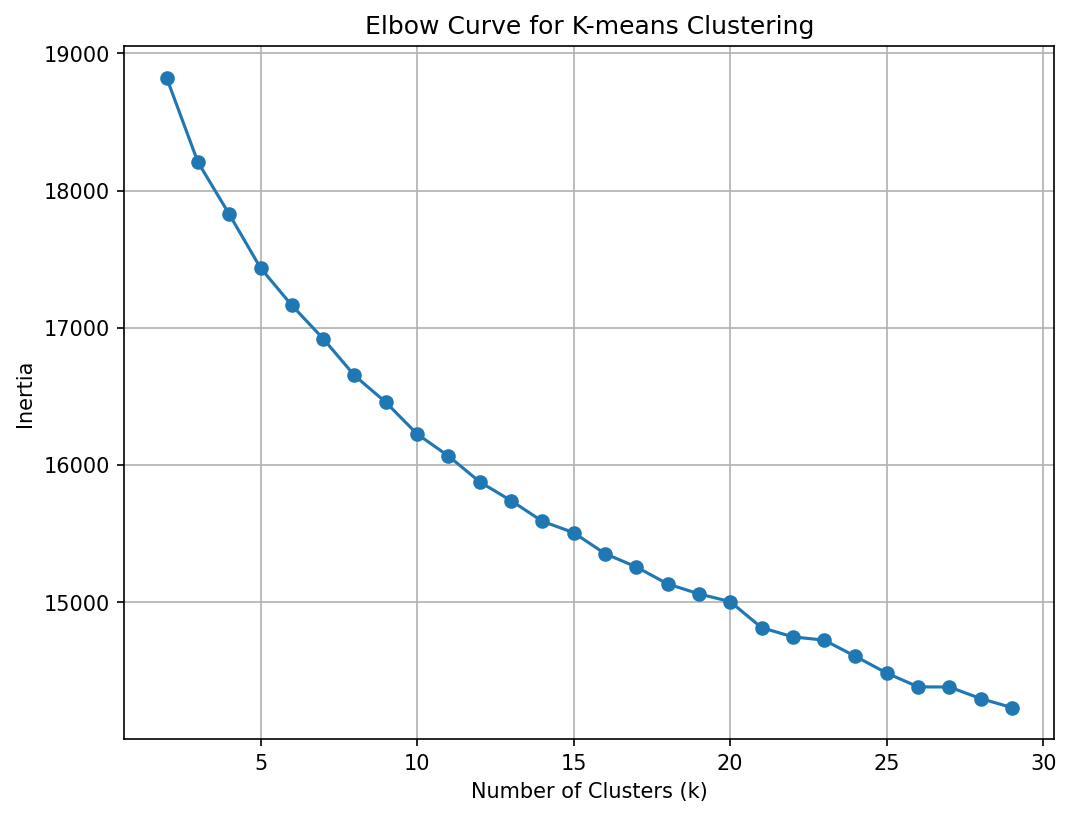

In [29]:
# Plot the elbow curve
plt.figure(figsize=(8, 6),dpi=150)
plt.plot(range(2, 30), inertia, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Curve for K-means Clustering')
plt.grid(True)
plt.show()

In [30]:
# Perform K-means clustering with best K
best_kmeans = KMeans(n_clusters=3, n_init=10, random_state=42)
clusters = best_kmeans.fit_predict(embeddings)

In [32]:
clusters

array([1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [33]:
len(clusters)

928

**Du lịch**

In [64]:
total = len(os.listdir('/content/ThoiSu_DuLich_TheGioi/results/du-lich'))
total

318

In [65]:
labels = clusters[:total]
labels

array([1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [66]:
num_0 = sum([e == 0 for e in labels])
num_1 = sum([e == 1 for e in labels])
num_2 = sum([e == 2 for e in labels])

In [67]:
def draw_pie_chart(labels, sizes, explode = (0, 0.1, 0)):
  import matplotlib.pyplot as plt

  # Data for the pie chart
  # labels = ['A', 'B', 'C', 'D']
  # sizes = [15, 30, 45, 10]  # Values for each slice
  # explode = (0, 0.1, 0)  # "Explode" the 2nd slice

  # Plotting the pie chart
  plt.figure(figsize=(6, 6))  # Aspect ratio 1:1
  plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140, explode = explode)
  plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
  plt.title('Pie Chart Example')
  plt.show()


In [69]:
sizes = [num/total*100 for num in [num_0, num_1, num_2]]
sizes

[12.264150943396226, 87.73584905660378, 0.0]

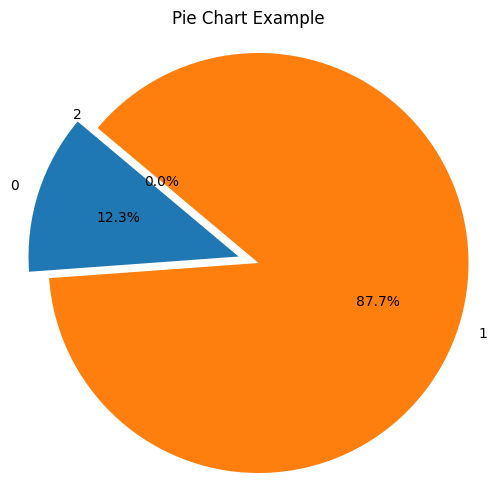

In [70]:
draw_pie_chart(['0', '1', '2'], sizes, (0.1, 0, 0))

**Thế giới**

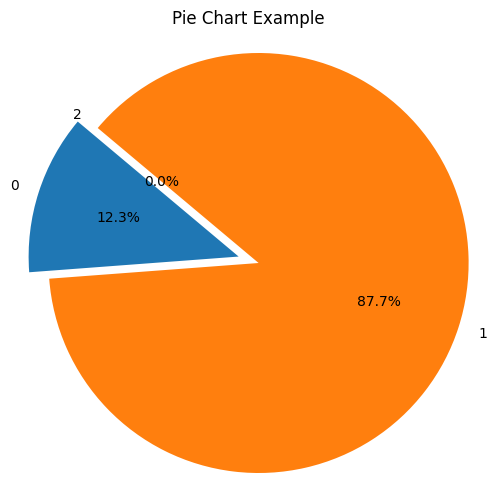

In [71]:
total = len(os.listdir('/content/ThoiSu_DuLich_TheGioi/results/the-gioi'))
total
labels = clusters[:total]
labels

num_0 = sum([e == 0 for e in labels])
num_1 = sum([e == 1 for e in labels])
num_2 = sum([e == 2 for e in labels])

sizes = [num/total*100 for num in [num_0, num_1, num_2]]
sizes

draw_pie_chart(['0', '1', '2'], sizes, (0.1, 0, 0))

In [72]:
total_1 = len(os.listdir('/content/ThoiSu_DuLich_TheGioi/results/the-gioi'))
total_1

317

In [74]:
labels = clusters[total:total+total_1]
labels

array([1, 0, 2, 0, 2, 0, 0, 2, 2, 0, 2, 0, 2, 0, 0, 2, 0, 2, 2, 2, 2, 0,
       0, 0, 2, 0, 0, 0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 2, 0, 0, 0, 2, 2, 0,
       2, 0, 0, 0, 2, 0, 2, 1, 0, 0, 2, 2, 2, 2, 0, 0, 2, 2, 0, 2, 0, 0,
       0, 0, 2, 2, 2, 0, 2, 2, 0, 0, 0, 0, 0, 2, 0, 0, 2, 0, 2, 0, 0, 0,
       2, 0, 0, 0, 2, 0, 2, 2, 0, 1, 0, 2, 1, 0, 2, 0, 2, 0, 2, 0, 2, 0,
       2, 2, 0, 0, 2, 2, 0, 2, 2, 2, 0, 0, 2, 0, 2, 2, 0, 2, 2, 0, 0, 1,
       0, 2, 2, 0, 2, 0, 0, 2, 0, 0, 2, 2, 0, 2, 0, 2, 2, 2, 2, 2, 2, 2,
       0, 2, 2, 2, 2, 2, 2, 0, 0, 0, 2, 0, 2, 0, 0, 2, 0, 2, 0, 0, 0, 2,
       0, 0, 2, 2, 2, 0, 0, 0, 2, 0, 2, 2, 0, 0, 2, 0, 2, 2, 0, 0, 2, 2,
       0, 0, 1, 0, 0, 2, 2, 2, 0, 0, 0, 0, 1, 2, 2, 2, 0, 0, 1, 2, 0, 0,
       0, 2, 0, 2, 2, 2, 0, 0, 0, 0, 2, 0, 2, 2, 2, 0, 0, 1, 2, 0, 0, 0,
       2, 2, 0, 0, 2, 0, 0, 2, 0, 0, 0, 1, 0, 0, 2, 0, 2, 0, 0, 2, 0, 2,
       2, 2, 2, 0, 2, 0, 0, 2, 0, 0, 2, 0, 0, 0, 0, 0, 2, 0, 0, 2, 0, 0,
       0, 0, 0, 0, 2, 0, 0, 0, 0, 2, 0, 2, 0, 0, 2,

In [75]:
num_0 = sum([e == 0 for e in labels])
num_1 = sum([e == 1 for e in labels])
num_2 = sum([e == 2 for e in labels])

sizes = [num/total_1*100 for num in [num_0, num_1, num_2]]
sizes

[53.31230283911672, 3.1545741324921135, 43.53312302839117]

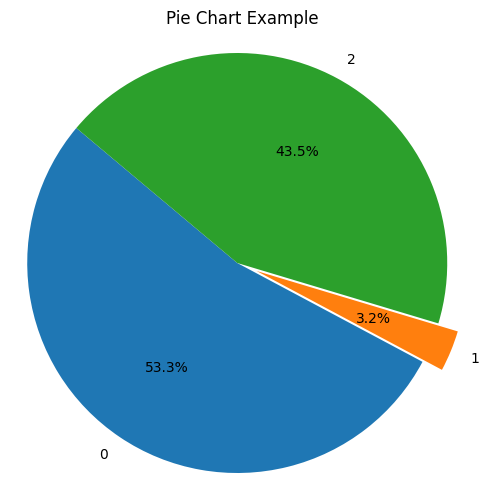

In [76]:
draw_pie_chart(['0', '1', '2'], sizes, (0, 0.1, 0))